##Getting Started With Matplotlib's OO Class Library
开始使用数学图形库的面向对象类库 (Translated from one [articl](https://github.com/ericliang/matplotlib/blob/master/trunk/scipy06/oo_resources/leftwich_tut.txt)_翻译自一篇[文章](https://github.com/ericliang/matplotlib/blob/master/trunk/scipy06/oo_resources/leftwich_tut.txt))

###Introduction  
简介

For those people coming to Matplotlib without any prior experience of MatLab and who are familiar with the basic concepts of programming API's and classes, learning to use Matplotlib via the class library is an excellent choice. The library is well put together and works very intuitively once a few fundamentals are grasped.

对于那些人来到数学图形库而没有任何先前经验于 MatLab 和那些人熟悉于基本概念于编程应用公共接口及类的，学习使用数学图形库通过类库是一个极好的选择。此库被完善的组合在一起并且工作的非常直观一旦一些基础被抓住。

The advice from John Hunter, the original developer of the library is 'don't be afraid to open up matplotlib/pylab.py to see how the pylab interface forwards its calls to the OO layer.' That in combination with the user's guide, the examples/embedding demos, and the mailing lists, which are regularly read by many developers are an excellent way to learn the class library.

建议来自乔亨特，原始开发者于此库是“不要害怕打开数学图形库/pylab.py 去查看如何pylab接口面向他的呼叫到那面向对象层。“结合于用户导引，例子/内嵌测试，邮件列表，其被常规的阅读由许多开发者，是一个极好的方式去学习那个类库。

Following is a brief intoduction to using the class library, developed as I came to grips with how to produce my first graphs.

下面是一个简短的介绍到使用此类库，开发于当我攻克如何绘出我的第一个图形。

###Classes/Terms
类/目

**FigureCanvas** - is primarily a container class to hold the Figure instance, an approach which enforces a rigid segregation between the plot elements, and the drawing of those elements. It can be loosely thought of as 'the place where the ink gose'.

**图画布** - 是基本上一个容器类去承载那图画实例，一个途径其确保一个硬性分离之间于图形元素，和这些元素的绘制。他可以被简单的想成“墨水行走的地方”。

**Figure** - a container for one or more Axes. It is possible to create and manage an arbitrary number of figures using the Figure class. Note also that a figure can have its own line, text and patch elements, independent of any axes.

**图片** - 一个容器为了一个或者多个坐标系。他是可能取创造和管理一个任意数目的图片其使用图片类。也要注意一个图片可以拥有它自己的线，文本和补丁元素，独立于任何坐标系。

**Axes** -  the rectangular area which holds the basic element (Line2D, Rectangle, Text, etc) that are generated by the Axes plotting commands (e.g. the Axes plot, scatter, bar, hist methods). The Figure methods add_axes and add_subplot are used to create and add an Axes instance to the Figure. You should not instantiate an Axes instance yourself, but rather use one of these helper methods.

**坐标系** - 一个矩形区域其承载基本元素（二维线，矩形，文本，等等）其被生成由坐标系的绘图命令（如：坐标系的绘图，散点，柱形，直方方法）。图片的方法”添加坐标系“和”添加子绘图“被用来创建和添加一个坐标系实例到图片。你不应该实例化一个坐标系实例单独的，而是使用这些帮助方法之一。

**Line** - implemented in the Line2D class, can draw lines(!) with a variety of style (solid, dashed, dotted, etc), markers (location indicators on the line - point, circle, triangle, diamond, etc) and colours (k or #000000 -black, w or #FFFFFF - white, b or #000099 - blue, etc).

**线** - 被部署在二维线类，可以绘多重线带着丰富的样式（实线，虚线，点，等等），记号（位置标记在线上 - 点，圈，三角，钻石，等等）和颜色（k 或者 #000000 - 黑色， w 或者 #FFFFFF - 白色， b 或者 #000099 - 蓝色，等等）。

**Text** - a class that handles storing and drawing of text in window or data coordinates. The text can be coloured, rotated, aligned in various ways relative to the origin point, and have font properties(weight, style, etc) assigned to it.

**文本** - 一个类其把握保存和绘制文本在窗口或者数据相应。文本可以被着色，旋转，对齐在不同方式相对于原始点，且有字体属性（字重，样式，等等）被赋予给他。

**Patch** - a patch is a two dimensional shape with a separately sepcifiable face and edge colour. Specialised patch classes include circle, rectangle, regular polygon and more.

**补丁** - 一个补丁是一个二维形状带着一个分开指定的表面和边角颜色。特定的补丁类包括圆，矩形，规则多边形等等。

**Ticks** - the indicators of where on an axis a particular value lies. Separate classes exist for the x and y axis ticks, (XTick, YTick) and each are comprised of the primitive Line2D and Text instances that make up the tick.

**刻度线** - 位置标识于一个坐标轴之一个特定值所在。独立的类存在对应于x和y轴刻度线，（XTick, YTick）且每一个都构成由原始二维线和文本实例其组成彼刻度线。

**Artist** - Everything that draws into a canvas derives from Artist (Figure, Axes, Axis, Line2D, Rectangle, Text, and more). Some of these are primitives (Line2D, Rectangle, Text, Circle, etc) in that they do not contain any other Artists, some are simple composites, e.g. XTick which is mad up of a couple of Line2D and Text instances (upper and lower tick lines and labels), and some are complex, e.g. and Axes or a Figure, which contain both composite and primitive artists.

**艺术体** - 所有被画进画布的都衍生自艺术体（图片，坐标系，坐标轴，二维线，矩形，文本，等等）。其中有些是原始类（二维线，矩形，文本，圆形，等等）于其中他们不包含任何其他艺术体，一些是简单的组合体，例如X轴刻度线被构成由一对二维线和文本实例（上合下刻度线及标签），一些是复合体，如一个坐标系或者一个图片，其包含既有组合体也有原始艺术体。

###Techniques
技巧

###1. Setting up an agg backend canvas:
设定画布

In [6]:
%matplotlib inline
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
fig = Figure()
canvas = FigureCanvas(fig)

###2. To set the size of the Figure, use the figsize keyword, which uses inches as the units:
设定图片尺寸，使用 figsize 关键字，其使用英寸作为单元。

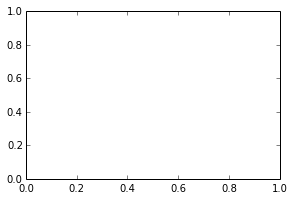

In [54]:
# this results in a 1000x300 pixel png - if output at 100 dpi, using
# canvas.print_figure(.., dpi=100)
fig = Figure(figsize=(10, 3))
ax1 = fig.add_subplot(121) # The 121 specifies 1 row, 2 column on subplot #1
canvas = FigureCanvas(fig)

fig

### 3. To add a single subplot
添加一个子绘图

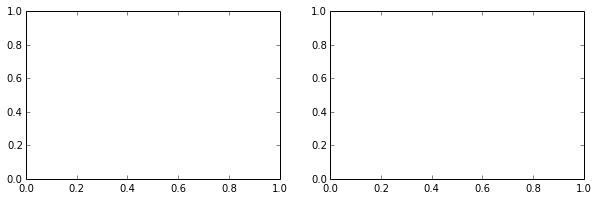

In [55]:
# The 111 specifies 1 row, 1 column on subplot #1
ax2 = fig.add_subplot(122)
fig

###4. To change the axes size and location on construction, e.g to fit the labels in on a small graph:
改变坐标系大小和位置在生成的时候，例如：设定标签到一个小号：

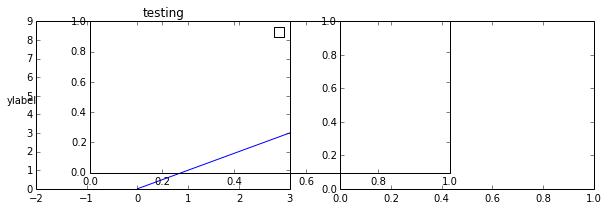

In [56]:
ax3 = fig.add_axes([0.2,0.2,0.5,0.7])

ax1.set_xlim(-2,3)
ax1.set_title('testing')
ax1.set_ylabel('ylabel',rotation=0)
ax1.legend(['legend','legned2'])
ax1.plot(range(0,10),range(0,10))

fig

An exiting Axes position/location can be changed by calling the set_position() method.

一个存在的坐标系位置/定位可以被改变由呼叫 set_position() 方法。

###5. Adding a graph of some sort is as simple as calling the requied functin on the axes instance:
添加一个视图于一些排列只是呼叫需要的函数在那坐标系实例：

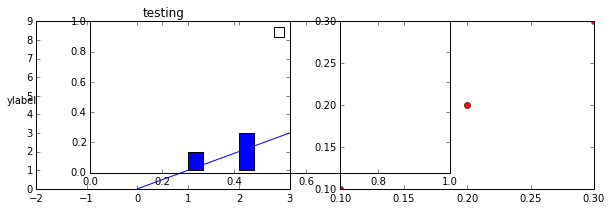

In [57]:
p = ax1.bar([1,2,3],[1,2,3],0.3,bottom=1)# left, height, width, bottom
p1 = ax2.plot([0.1,0.2,0.3],[0.1,0.2,0.3],'ro')
fig

###6. Setting a label with extra small text:
设定标签以特小文本。

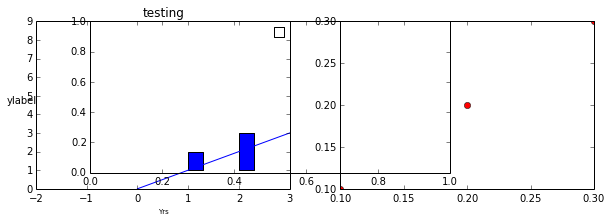

In [58]:
ax1.set_xlabel('Yrs', size='x-small')
fig

###7. Setting the graph title:
设定视图标题。

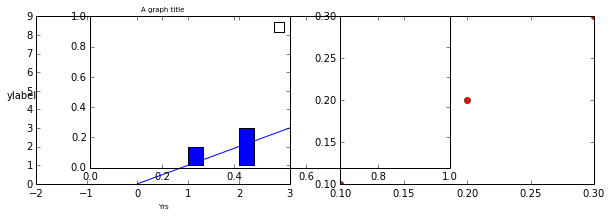

In [59]:
ax1.set_title('A graph title', size='x-small')
fig

###8. To enable only the horizontal grid on the major ticks:
只启用水平栅格在主刻度线。

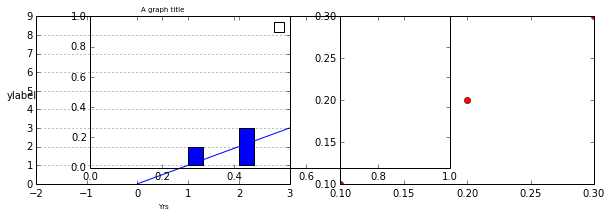

In [60]:
ax1.grid(False)
ax1.yaxis.grid(True, which='major')
fig

###9. To only have a left y-axis and a bottom x-axis:
只要左y坐标轴和一个底部x坐标轴。

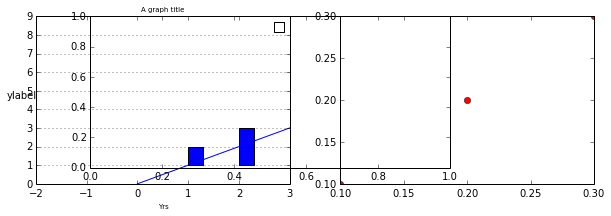

In [61]:
from matplotlib.lines import Line2D

# set the edgecolor and facecolor of the axes rectangle to be the same 
frame = ax1.axesPatch
frame.set_edgecolor(frame.get_facecolor())
# Specify a line in axes coords to represent the left and bottom axes.
bottom = Line2D([0,1],[0,0], transform=ax1.transAxes)
left   = Line2D([0,0],[0,1], transform=ax1.transAxes)
ax1.add_line(bottom)
ax1.add_line(left)
fig

###10. To change the size of the tick labels:
改变刻度线标签大小。

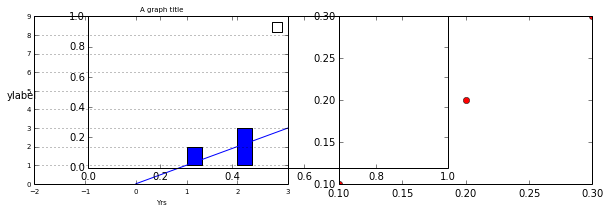

In [63]:
labels = ax1.get_xticklabels() + ax1.get_yticklabels()
for label in labels:
    label.set_size('x-small')
fig

###11. Removing the black ractangle around an individual bar graph rectangle (by changing it to the bar colour):
移除黑色边矩形包围在一个独立柱形矩形（通过改变他到柱形的颜色）。

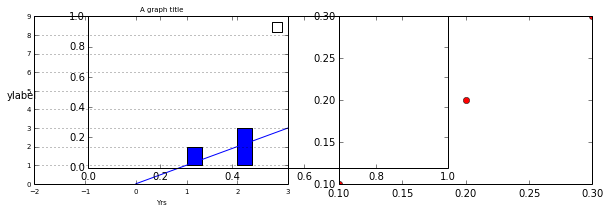

In [64]:
c = '#7FBFFF'
p1 = ax1.bar(4, 2,color=c)
for r in p1:
    r.set_edgecolor(c)
fig

###Putting it together
聚合

Following is a simple example of how to use the class library.
This is example/agg_oo.py in the matplotlib src distribution, also found (like all examples) at http://matplotlib.sf.net/examples

'''  
A pure OO (look Ma, no pylab!) example using the agg backend

'''

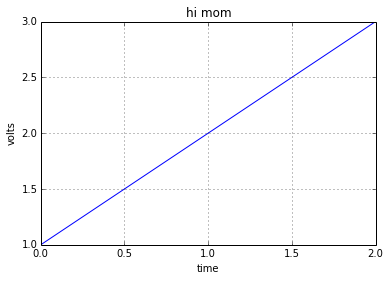

In [65]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

fig = Figure()
canvas = FigureCanvas(fig)
ax = fig.add_subplot(111)
ax.plot([1,2,3])
ax.set_title('hi mom')
ax.grid(True)
ax.set_xlabel('time')
ax.set_ylabel('volts')
#canvas.print_figure('test')
fig

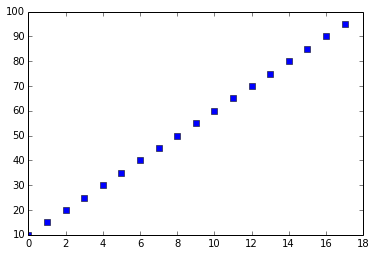

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline

#最简单的数学绘图
plt.plot(range(10,100,5),'bs')# b代表blue,s代表squre。还有rgk,-^_o可用。

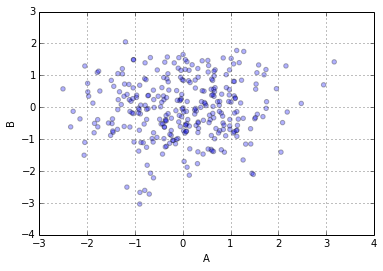

In [2]:
import numpy as np
import pandas as pd

# 一下三行代码测试生成随机散列图，来检查数据的重复状况，颜色越浓说明数据重复越高。
dates = pd.date_range('20150101', periods= 300)#生成随机Series
df1 = pd.DataFrame(np.random.randn(300,4), index=dates, columns=list('ABCD'))#生成随机DataFrame
df1.plot(kind='scatter',x='A', y='B', alpha=0.3)#生成散列图，查看数据重复状况，alpha设定透明度。

In [2]:
plt.__dict__

NameError: name 'plt' is not defined

In [ ]:
#面向对象的视图化思维
# from matplotlib.figure import Figure
# from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
# fig    = Figure()
# canvas = FigureCanvas(fig)
# ax     = fig.add_axes([0.1, 0.1, 0.8, 0.8])
# line,  = ax.plot([0,1], [0,1])
# ax.set_title("a straight line (OO)")
# ax.set_xlabel("x value")
# ax.set_ylabel("y value")
# #canvas.print_figure('/Users/chengang/Desktop/demo.pdf')

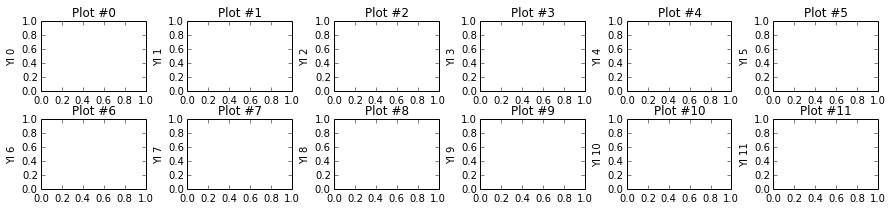

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(15, 3),dpi=100)
ax = range(12)
for i in range(12):
    ax[i] = fig.add_subplot(2,6,i+1)
    ax[i].set_title('Plot #%i' % i)
    ax[i].set_ylabel('Yl %i' % i)
    #ax[i].set_legend(['x']) #'AxesSubplot' object has no attribute 'set_legend'
fig.subplots_adjust(wspace=0.4,hspace=0.4) # adjust space
fig.savefig('f.pdf') # fig.savefig('f.png', dpi=200)

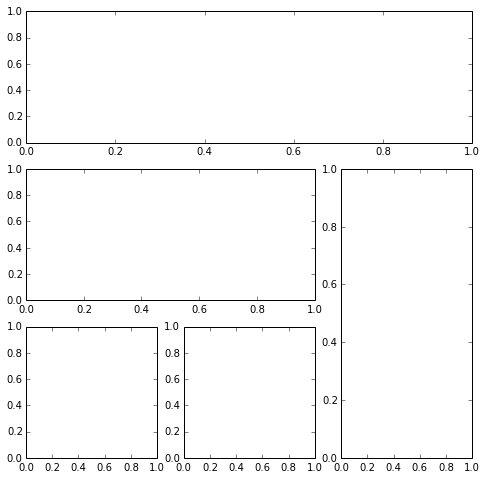

In [23]:
fig = plt.figure(figsize=(8,8))#  we tent to use OO, but it still relies on pyplot to instantiate the figure.
gs = plt.GridSpec(3,3)
axa = fig.add_subplot(gs[0,:])
axb = fig.add_subplot(gs[1,:2])
axc = fig.add_subplot(gs[1:,2])
axd = fig.add_subplot(gs[2,0])
axe = fig.add_subplot(gs[2,1])

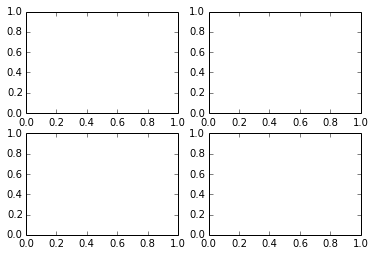

In [33]:
figs,ax = plt.subplots(2,2)

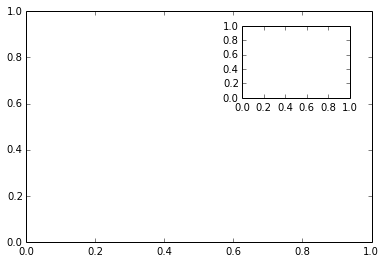

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

figi = plt.figure()
maax = figi.add_axes([0.1,0.1,0.8,0.8])
inax = figi.add_axes([0.6,0.6,0.25,0.25])

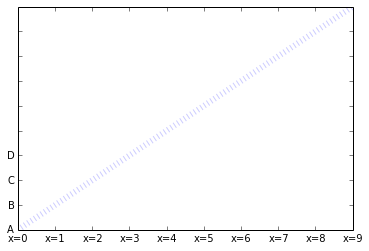

In [58]:
figg = plt.figure()
axx = figg.add_subplot(111)
axx.plot(range(0,10), alpha=0.2,linewidth=6,linestyle=':')
axx.xaxis.set_major_formatter(plt.FormatStrFormatter('x=%i'))
axx.yaxis.set_major_formatter(plt.FixedFormatter(['A','B','C','D']))

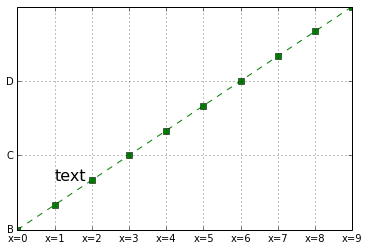

In [71]:
figg = plt.figure()
axx = figg.add_subplot(111)
axx.plot(range(0,10),'g--',marker='s')
axx.xaxis.set_major_formatter(plt.FormatStrFormatter('x=%i'))
axx.yaxis.set_major_formatter(plt.FixedFormatter(['A','B','C','D']))
axx.yaxis.set_major_locator(plt.MultipleLocator(3))
axx.legend(loc='upper right')
axx.axis('tight')
#axx.set_xticks([1,2,3])
#axx.set_xticklabels([2.2,2,2])
axx.grid(True)
axx.text(1,2,'text',fontsize=16)




In [31]:
plt.rcParams.keys()[:5]# check params

['agg.path.chunksize',
 'animation.avconv_args',
 'animation.avconv_path',
 'animation.bitrate',
 'animation.codec']

In [37]:
plt.rcParams['lines.linewidth']#check params value

1.0

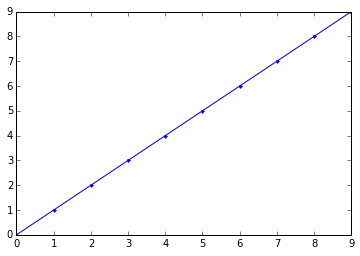

In [44]:
plt.rc('lines',linewidth=1.0)# rc(elememt_name, attr=val)
plt.plot(range(0,10),'b.-')

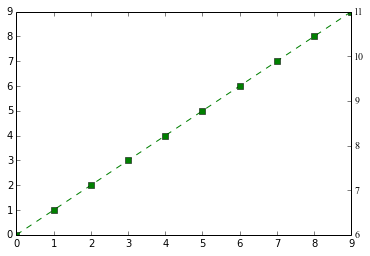

In [80]:
figg = plt.figure()
axx = figg.add_subplot(111)
axx.plot(range(0,10),'g--',marker='s')
axx2 = axx.twinx() # creat a new axes(axx2) shares the x-axis with axx.
axx2.set_yticklabels(range(6,12)) # setting axx2.y tick labels
for tick in axx2.yaxis.get_ticklabels():
    tick.set_fontname('Times New Roman')
